In [96]:
import numpy as np
import scipy as scipy
from numpy.random import uniform
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [97]:
#Fixed Parameters values
l_vel= 1.5
r_vel=2
rad_of_rob=0.25
wid_of_rob=0.5
sig_l=0.05
sig_r=0.05
sig_p=0.1

l_vel_p = []
r_vel_p = []

no_particles = 1000

In [98]:
#Particle set sampled from belief over initial state and control
def ParticleFilterPropagate(init_state,init_t,TimeStep_1):
        l_vel_p = l_vel + (np.random.randn(no_particles)*sig_l)
        r_vel_p = r_vel + (np.random.randn(no_particles)*sig_r)

        particle_set = np.zeros(shape=(3,no_particles),dtype=float) 
    
        for m in range (no_particles):
            si_w = (rad_of_rob/wid_of_rob)*(r_vel_p[m] - l_vel_p[m])
            si_r = 0.5 * rad_of_rob * (r_vel_p[m] + l_vel_p[m])
            
            v_mapping = np.matrix([[0,-si_w,si_r],[si_w,0,0],[0,0,0]])
            
            x = init_state[0,m]
            y = init_state[1,m]
            theta = init_state[2,m]
            
            init_pose = np.matrix([[np.cos(theta),-np.sin(theta),x],[np.sin(theta),np.cos(theta),y],[0,0,1]])
            poseMat = init_pose.dot(scipy.linalg.expm(TimeStep_1*v_mapping))
            
            particle_set[0,m] = poseMat[0,2]
            particle_set[1,m] = poseMat[1,2]
            particle_set[2,m] = np.arccos(poseMat[0,0])
            
            mean=np.mean(particle_set)
            
            covariance=np.cov(particle_set)
        
        print("MEAN:",mean)
        
        print("COVARIANCE",covariance)
        
        return (particle_set)

In [99]:
#Particle set sampled from prior belief over a state and measurement
def ParticleFilterUpdate(particle_set,Zt):
        
        imp_weights = np.ones(shape=(1,no_particles))
        
        for i in range(no_particles):
            W_i = Zt - np.matrix([[particle_set[0,i]],[particle_set[1,i]]])
            imp_weights[0,i] = (1/(np.sqrt(2*np.pi)*sig_p))*scipy.linalg.expm((-0.5/np.power(sig_p,2))* (W_i.T.dot(W_i)))
        
        imp_weights = imp_weights/np.sum(imp_weights)

        arr_particles = (np.arange(no_particles) + np.random.random()) / no_particles
        
        arranged = np.zeros(no_particles,int)
        
        T_sum = np.cumsum(imp_weights)
        
        m = 0
        n = 0
        
        while m < no_particles and n < no_particles:
            if arr_particles[m] < T_sum[n]:
                arranged[m] = n
                m += 1
            else:
                n += 1
        
        particle_set[0,:] = particle_set[0,arranged]
        
        particle_set[1,:] = particle_set[1,arranged]
        
        particle_set[2,:] = particle_set[2,arranged]
        
        return(particle_set)

MEAN: 1.364200436443222
COVARIANCE [[ 0.01822001 -0.01454455 -0.02212289]
 [-0.01454455  0.01494886  0.02025935]
 [-0.02212289  0.02025935  0.02891315]]
MEAN: 2.2155082377256288
COVARIANCE [[ 0.40804343  0.03849199 -0.21558568]
 [ 0.03849199  0.02056645 -0.01758272]
 [-0.21558568 -0.01758272  0.11670737]]
MEAN: 1.602944214360955
COVARIANCE [[0.41190188 0.49620657 0.2105617 ]
 [0.49620657 0.79488473 0.38304171]
 [0.2105617  0.38304171 0.2013324 ]]
MEAN: 0.48442654624847653
COVARIANCE [[ 0.33971744 -0.28351477 -0.21185512]
 [-0.28351477  1.6527479   0.83564118]
 [-0.21185512  0.83564118  0.44471455]]


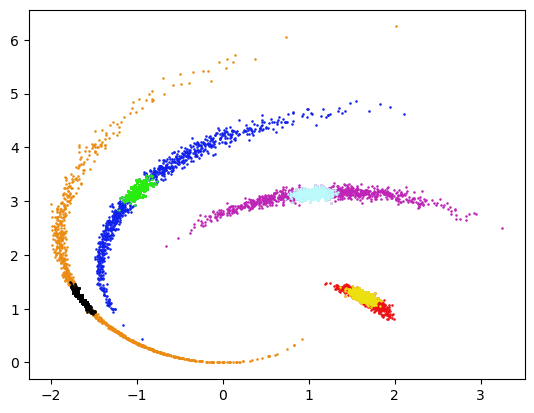

In [100]:
#Required Plots
fig = plt.figure()
ax = plt.axes()


Output = ParticleFilterPropagate(np.zeros(shape=(3,no_particles),dtype=float),0,5)
ax.scatter(Output[0],Output[1],s=0.7,color = '#Ec1114')
Output = ParticleFilterUpdate(Output,np.matrix([[1.6561],[1.2847]]))
ax.scatter(Output[0],Output[1],s=0.7,color = '#Ece011')


Output = ParticleFilterPropagate(np.zeros(shape=(3,no_particles),dtype=float),0,10)
ax.scatter(Output[0],Output[1],s=0.7,color = '#Be25b6')
Output = ParticleFilterUpdate(Output,np.matrix([[1.0505],[3.1059]]))
ax.scatter(Output[0],Output[1],s=0.7,color = '#Bbfbfb')


Output = ParticleFilterPropagate(np.zeros(shape=(3,no_particles),dtype=float),0,15)
ax.scatter(Output[0],Output[1],s=0.7,color='#1121ec')
Output = ParticleFilterUpdate(Output,np.matrix([[-0.9875],[3.2118]]))
ax.scatter(Output[0],Output[1],s=0.7,color='#29ec11')


Output = ParticleFilterPropagate(np.zeros(shape=(3,no_particles),dtype=float),0,20)
ax.scatter(Output[0],Output[1],s=0.7,color='#Ec8b11')
Output = ParticleFilterUpdate(Output,np.matrix([[-1.6450],[1.1978]]))
ax.scatter(Output[0],Output[1],s=0.7,color='#000000')

plt.show()